In [87]:
'''
Author: Nischay Gowda nischaygowda105@gmail.com
Date: 2023-02-19 16:47:37
LastEditors: Nischay Gowda nischaygowda105@gmail.com
LastEditTime: 2023-02-19 18:53:56
FilePath: \Credit-Card-Fraud\notebooks\exp_data_analysis.ipynb
Description:
'''

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
DATA_LOCATION = 'G:\My Drive\Internship_work_related\DS Projects\Credit-Card-Fraud\data'

data_df = pd.read_csv(DATA_LOCATION + '\creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
# data_df.describe()
# No Null values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [90]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [91]:

# Data check
print(data_df['Class'].value_counts())
print('No Frauds', round(data_df['Class'].value_counts()[0]/len(data_df) * 100, 2), '% of dataset')
print('Frauds', round(data_df['Class'].value_counts()[1]/len(data_df) * 100, 2), '% of dataset')

0    284315
1       492
Name: Class, dtype: int64
No Frauds 99.83 % of dataset
Frauds 0.17 % of dataset


Dataset is higly imbalanced. Skewed data. There are 492 Fraud cases.

In [92]:
# scaling the Time and Amount column as the other columns. We need to create a sub sample of dataframe in order to have an equal amount of 
# fraud amd non-fraud cases, helping our algorithms better understand patterns.

# RobustScaler is robust to outliers. Sacles as per quartile ranges.
robust_scaler = RobustScaler()

data_df['scaled_time'] = robust_scaler.fit_transform(data_df['Time'].values.reshape(-1,1))
data_df['scaled_amount'] = robust_scaler.fit_transform(data_df['Amount'].values.reshape(-1,1))

# drop Time and Amount
data_df.drop(['Time','Amount'], axis = 1, inplace=True)


In [93]:
# rearrange data columns
scaled_amount = data_df['scaled_amount']
scaled_time = data_df['scaled_time']

data_df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace=True)
data_df.insert(0, 'scaled_time', scaled_time)
data_df.insert(1, 'scaled_amount', scaled_amount)

data_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [94]:
X = data_df.drop('Class', axis = 1)
y = data_df['Class']

data_split = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for train_idx, test_idx in data_split.split(X, y):
    print("Train:", train_idx, "Test:", test_idx)
    original_X_train, original_X_test = X.iloc[train_idx], X.iloc[test_idx]
    original_y_train, original_y_test = y.iloc[train_idx], y.iloc[test_idx]
    

# Turn into an array.
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values


train_unique_label, train_counts_label = np.unique(original_y_train, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts = True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label / len(original_y_train))
print(test_counts_label / len(original_y_test))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [95]:
# Random Undersampling
data_shuffle_df = data_df.sample(frac = 1)
# Return a random sample of items from an axis of object.

# amout of fraud classes 492 rows
fraud_df = data_shuffle_df.loc[data_shuffle_df['Class'] == 1]
non_fraud_df = data_shuffle_df.loc[data_shuffle_df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# shuffle the dataframe rows.
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
119207,-0.109506,-0.293440,1.232541,-0.229078,-0.332437,0.085030,1.574014,3.959499,-1.130610,1.067739,0.628703,-0.085075,-0.434035,0.219161,0.048422,-0.104049,0.810640,0.597507,-0.905791,0.516239,0.010670,-0.017898,-0.063689,-0.169412,-0.034040,0.997738,0.552450,-0.383992,0.072908,0.030969,0
151103,0.116695,0.164326,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,0.912806,0.765354,-2.043868,1.001547,1.322887,-2.720077,-0.153430,0.752611,-0.755786,-1.912563,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,1
161265,0.344776,0.779711,1.917796,-1.618641,-1.119342,-1.288064,0.684367,4.284646,-2.105655,1.187217,0.344493,0.780184,-0.396310,0.072749,0.462885,-0.427178,1.185678,-0.764289,-0.565588,1.588646,-1.420697,-0.359765,-0.110119,0.071525,0.304744,0.706988,-0.641763,0.526963,0.045207,-0.022451,0
152019,0.141273,-0.293440,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,-6.625692,2.175230,-4.381078,2.063299,-0.673818,1.400763,-4.254927,-5.160213,-1.302526,2.594453,3.639603,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,1
57248,-0.433111,-0.201495,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,0.141179,-0.460348,-0.367868,-1.168339,0.152108,0.882232,0.601805,-0.304092,-2.191764,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1


Analysis and Data preprocessing

Distribution of Classes in subsample datatset
0    0.5
1    0.5
Name: Class, dtype: float64


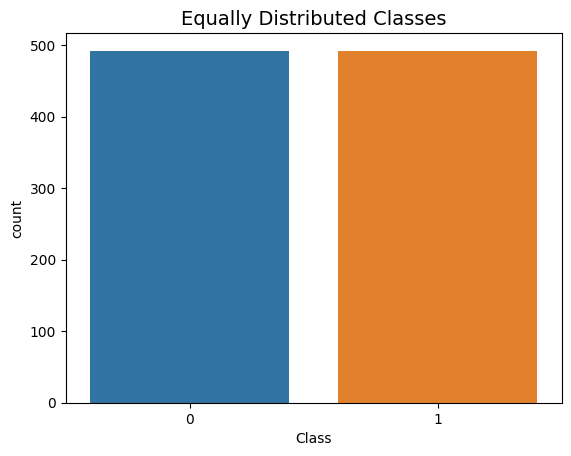

In [96]:
print('Distribution of Classes in subsample datatset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(data = new_df, x = 'Class')
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()